In [9]:
import numpy as np
from smt.surrogate_models import KRG, RBF
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [10]:
training_df = pd.read_csv('Monte_Carlo_10000/training_data.csv')

In [11]:
X = training_df[['outer_wall_thickness', 'inside_wall_side_thickness', 'inside_wall_middle_thickness', 'height', 'width', 'sigma0', 'youngs']].values

Y_mean = training_df[['mean_force']].values
Y_max = training_df[['max_force']].values

X_mean_train, X_mean_val, Y_mean_train, Y_mean_val = train_test_split(X, Y_mean, test_size=0.2, random_state=42)
X_max_train, X_max_val, Y_max_train, Y_max_val = train_test_split(X, Y_max, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_mean_train = scaler.fit_transform(X_mean_train)
X_mean_val = scaler.transform(X_mean_val)
scaler = MinMaxScaler()
X_max_train = scaler.fit_transform(X_max_train)
X_max_val = scaler.transform(X_max_val)

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 80
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (80 x 80 mtx) ...
         Performing LU fact. (80 x 80 mtx) - done. Time (sec):  0.0141020
      Initializing linear solver - done. Time (sec):  0.0141501
      Solving linear system (col. 0) ...
         Back solving (80 x 80 mtx) ...
         Back solving (80 x 80 mtx) - done. Time (sec):  0.0056009
      Solving linear system (col. 0) - done. Time (sec):  0.0056489
   Training - done. Time (sec):  0.0416713
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 20
   
   Predicting ...
   Pre

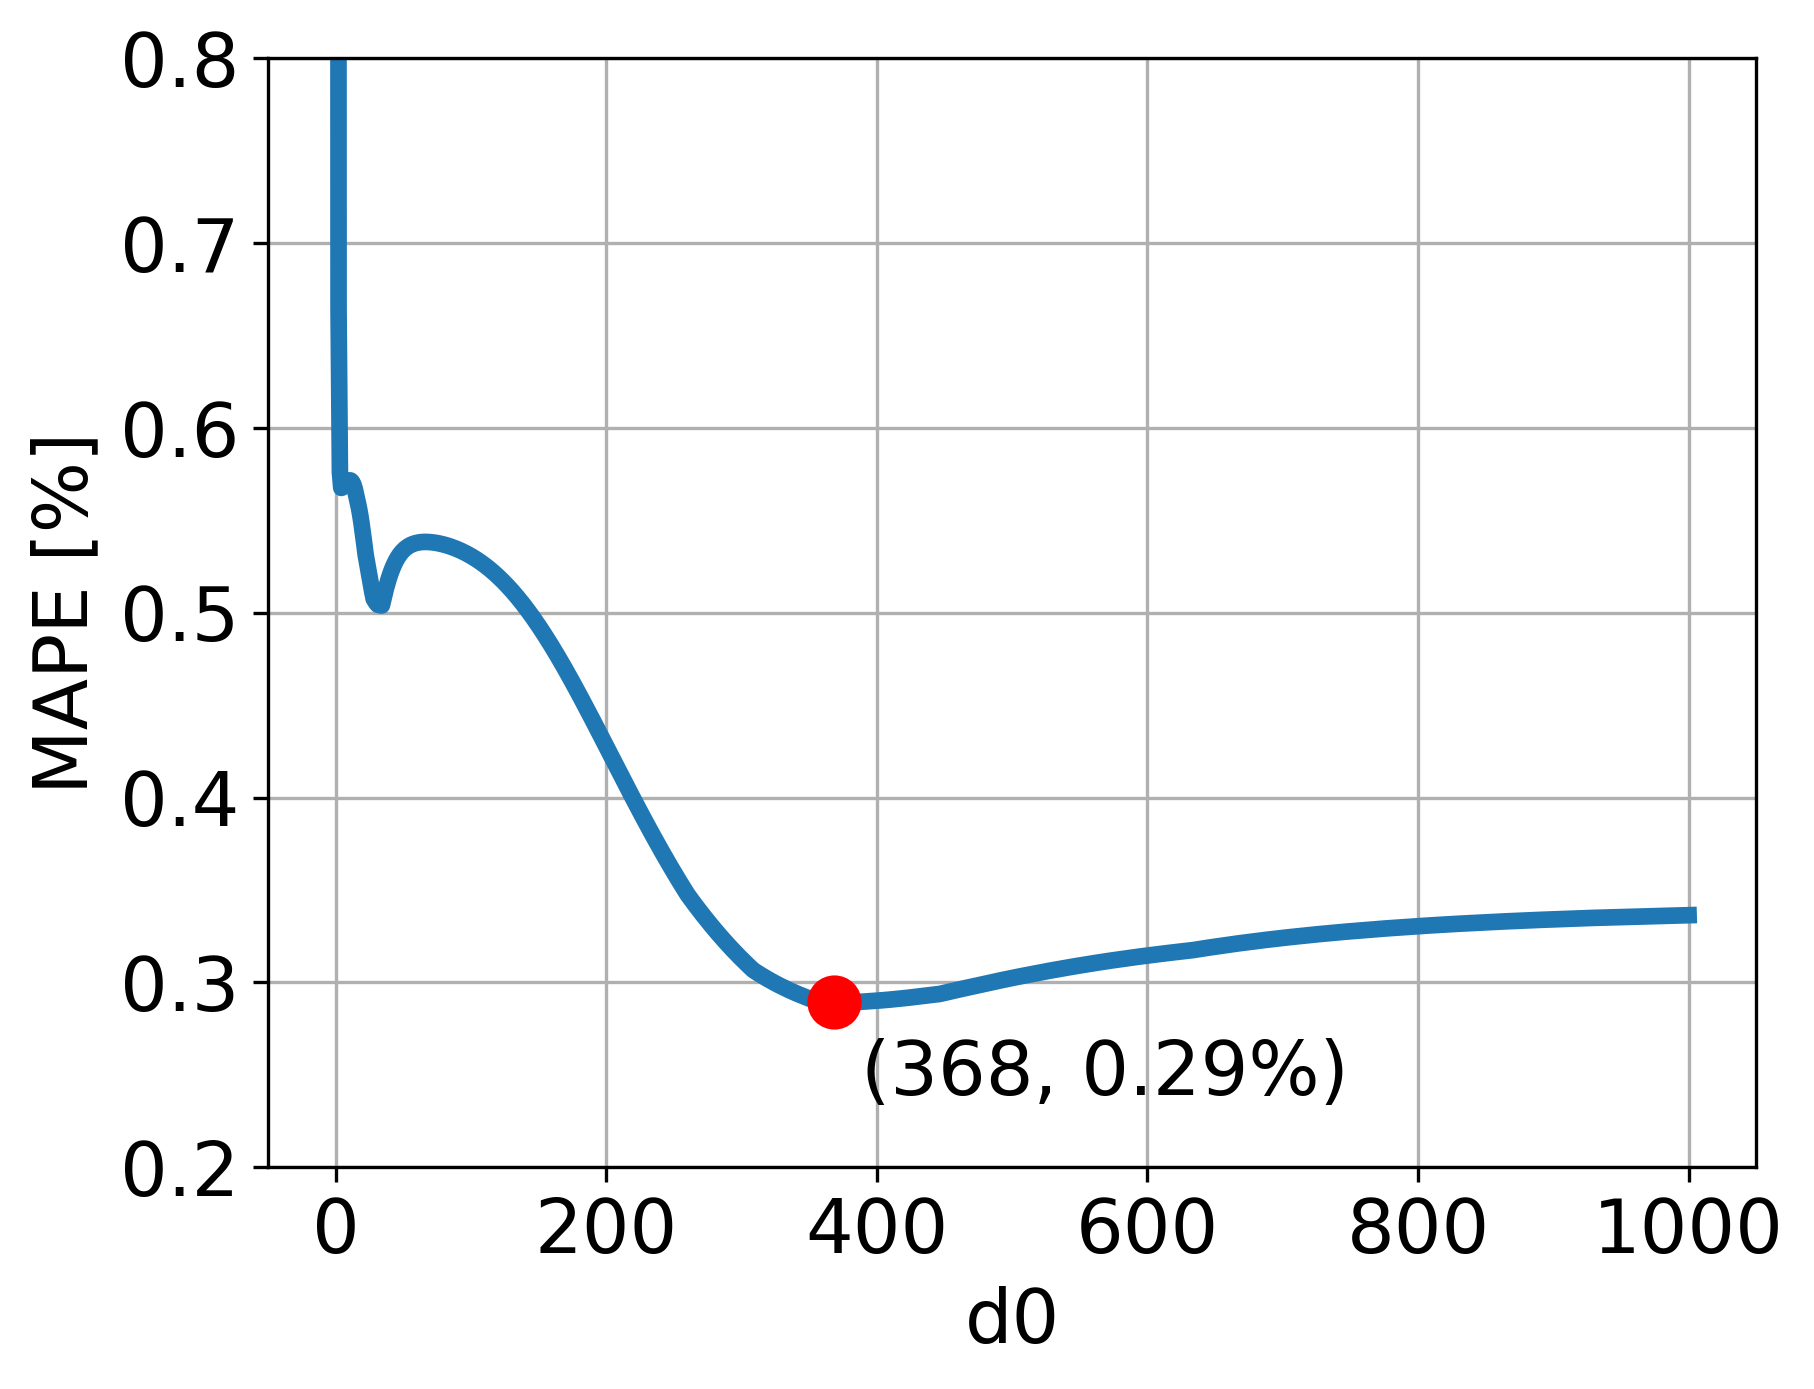

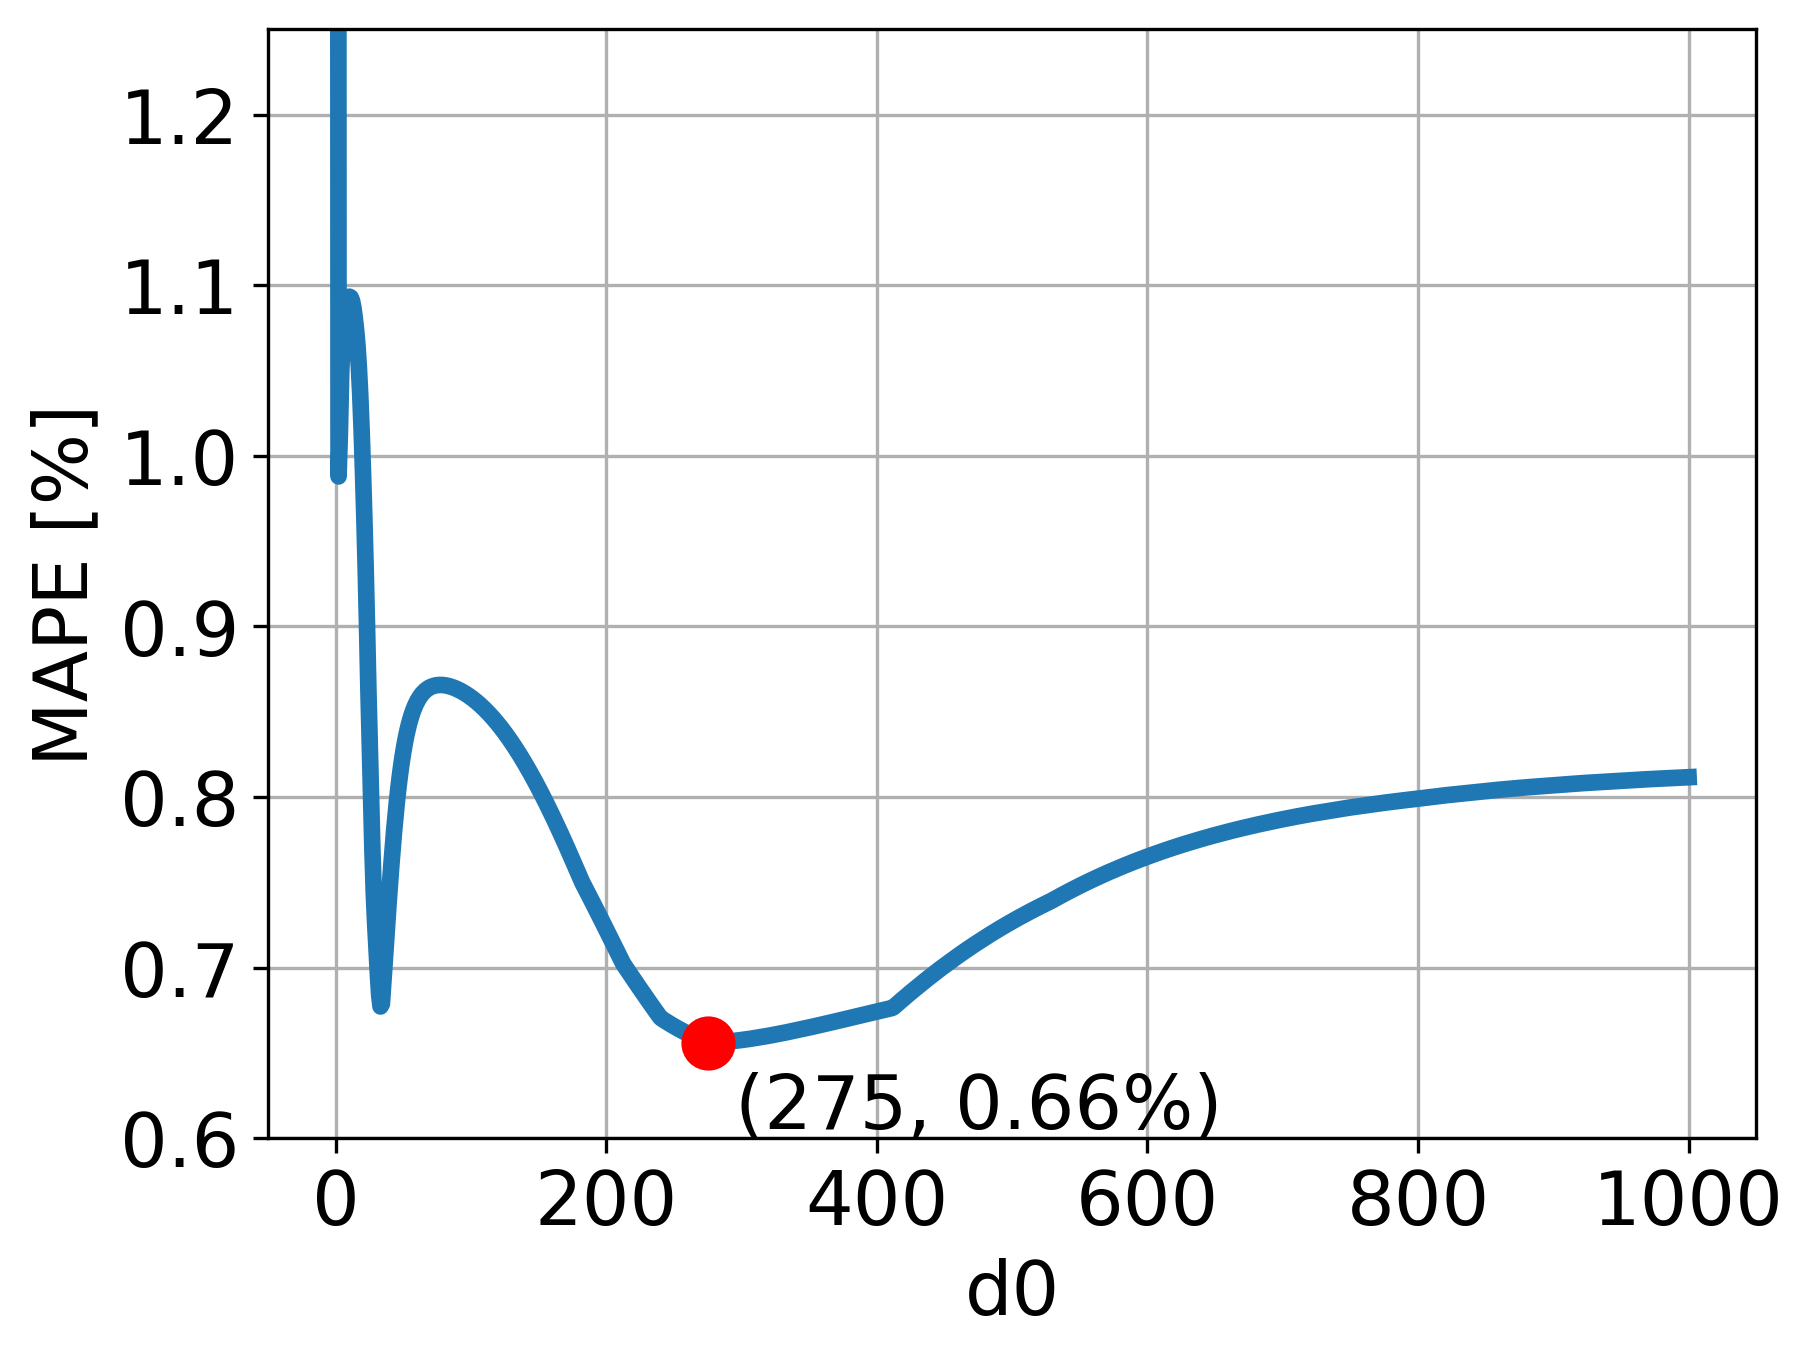

In [20]:
d0_values = np.linspace(0.0001, 1000, 1000)

results_mean = {}
for i in range(len(d0_values)):
    RBF_model = RBF(d0=d0_values[i])
    RBF_model.set_training_values(X_mean_train, Y_mean_train)
    RBF_model.train()
    Y_mean_pred = RBF_model.predict_values(X_mean_val)
    mse = mean_squared_error(Y_mean_val, Y_mean_pred)
    mae = mean_absolute_error(Y_mean_val, Y_mean_pred)
    mape = mean_absolute_percentage_error(Y_mean_val, Y_mean_pred)
    results_mean[d0_values[i]] = mape*100

results_max = {}
for i in range(len(d0_values)):
    RBF_model = RBF(d0=d0_values[i])
    RBF_model.set_training_values(X_max_train, Y_max_train)
    RBF_model.train()
    Y_max_pred = RBF_model.predict_values(X_max_val)
    mse = mean_squared_error(Y_max_val, Y_max_pred)
    mae = mean_absolute_error(Y_max_val, Y_max_pred)
    mape = mean_absolute_percentage_error(Y_max_val, Y_max_pred)
    results_max[d0_values[i]] = mape*100

x_max_MAX = min(results_max, key=results_max.get)
y_max_MAX = results_max[x_max_MAX]

plt.figure(dpi=300)
plt.ylim(0.2, 0.8)
plt.plot(results_max.keys(), results_max.values(), lw=4)
plt.plot(min(results_max, key=results_max.get), min(results_max.values()), 'ro', markersize=12)
plt.annotate(f'({x_max_MAX:.0f}, {y_max_MAX:.2f}%)', xy=(x_max_MAX, y_max_MAX), xytext=(x_max_MAX+20, y_max_MAX-0.05), fontsize=18)
plt.xlabel('d0', fontsize=18)
plt.ylabel('MAPE [%]', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.show()

x_mean_MAX = min(results_mean, key=results_mean.get)
y_mean_MAX = results_mean[x_mean_MAX]

plt.figure(dpi=300)
plt.ylim(0.6, 1.25)
plt.plot(results_mean.keys(), results_mean.values(), lw=4)
plt.plot(min(results_mean, key=results_mean.get), min(results_mean.values()), 'ro', markersize=12)
plt.annotate(f'({x_mean_MAX:.0f}, {y_mean_MAX:.2f}%)', xy=(x_mean_MAX, y_mean_MAX), xytext=(x_mean_MAX+20, y_mean_MAX-0.05), fontsize=18)
plt.xlabel('d0', fontsize=18)
plt.ylabel('MAPE [%]', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.show()